# GPT NUDITY CLassifier

In [9]:
import base64
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# OpenAI API Key

In [2]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [10]:
def classify(image_path):
    # Getting the base64 string
    base64_image = encode_image(image_path)
    headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
    }
    
    payload = {
        "model": "gpt-4-vision-preview",
        "messages": [
          {
            "role": "user",
            "content": [
              {
                "type": "text",
                "text": "Describe the image. Answering:"
                       + " is the person with shirt? yes or no"
                       + " Describe the background: is it a slum? is it something else?"
              },
              {
                "type": "image_url",
                "image_url": {
                  "url": f"data:image/jpeg;base64,{base64_image}"
                }
              }
            ]
          }
        ],
        "max_tokens": 4096
    }
    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    return response.json()

def show_image(img):
    img1 = mpimg.imread(img)  
    plt.imshow(img1)
    plt.axis('off')  # Optional: Turn off axis labels and ticks
    plt.show()

{'id': 'chatcmpl-8JMP85yU4KzK4v01RjSadTfRFMvBP', 'object': 'chat.completion', 'created': 1699625046, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 803, 'completion_tokens': 104, 'total_tokens': 907}, 'choices': [{'message': {'role': 'assistant', 'content': 'Is the person with shirt? No, the person in the image appears to be not wearing a shirt.\n\nDescribe the background: The background is not distinctly visible, but it appears to be a natural setting. There are parts of some plants, possibly palm leaves, in the immediate background behind the person. It is not a slum; it looks more like a garden or a natural outdoor environment. The focus is on the person, with the background being somewhat blurred due to shallow depth of field typically used in portrait photography.'}, 'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'}, 'index': 0}]}


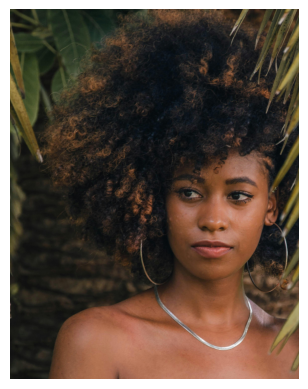

In [11]:
image_path = "Images/pexels-nicole-berro-1994818.jpg"
print(classify(image_path))
show_image(image_path)

{'id': 'chatcmpl-8JMQSnpTqRsjwM1nXcnJeDiCTuC4v', 'object': 'chat.completion', 'created': 1699625128, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 1143, 'completion_tokens': 79, 'total_tokens': 1222}, 'choices': [{'message': {'role': 'assistant', 'content': 'Is the person with shirt? Yes.\n\nDescribe the background: The background is fairly nondescript and appears to be a plain, solid-colored wall. It is light in color and provides a neutral backdrop with no discernible features, therefore it is not a slum. It is something else—likely an interior wall meant for portrait photography or professional headshots given its simplicity and lack of distraction.'}, 'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'}, 'index': 0}]}


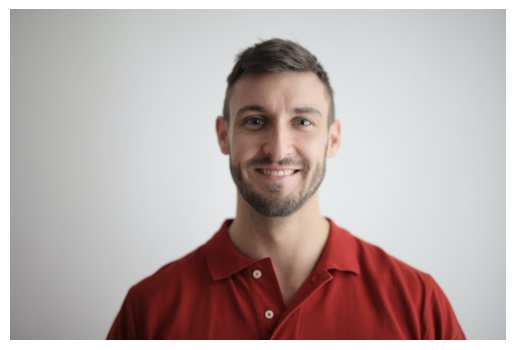

In [12]:
image_path = "Images/pexels-andrea-piacquadio-3777943.jpg"
print(classify(image_path))
show_image(image_path)